In [ ]:
#Light Reading
#https://www.sjsu.edu/people/burford.furman/docs/me120/FFT_tutorial_NI.pdf
#https://kluedo.ub.uni-kl.de/frontdoor/deliver/index/docId/4293/file/exact_fft_measurements.pdf

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.fftpack

df = pd.read_csv('Sample Waveform.csv')
df = df.drop(columns = 'Unnamed: 0')
n = len(df)

In [2]:
twosidedFFT = (1/n) * abs(sp.fftpack.fft(df['CHANnel1 Data'].to_numpy()))
dcBin = twosidedFFT[0]
onesidedFFT  = 2 * twosidedFFT
onesidedFFT[0] = dcBin
powerFFT = onesidedFFT ** 2
powerFFTdBm = 10 * np.log10(powerFFT / (50 * .001))
fftFreq = sp.fftpack.fftfreq(n, (df['Timestamp'].max() - df['Timestamp'].min()) / n)

In [3]:
freqFrame = pd.DataFrame(fftFreq, columns = ['Frequency (Hz)'])
dbmFrame = pd.DataFrame(powerFFTdBm, columns = ['Power (dBm)'])
fftFrame = freqFrame.join(dbmFrame)
fftFrame = fftFrame.loc[fftFrame['Frequency (Hz)'] > 0]
fftFrame['Frequency (MHz)'] = fftFrame['Frequency (Hz)'] / 1E6

,Frequency (Hz),Power (dBm),Frequency (MHz)
379996,7.599923e+08,-2.993751,759.992304


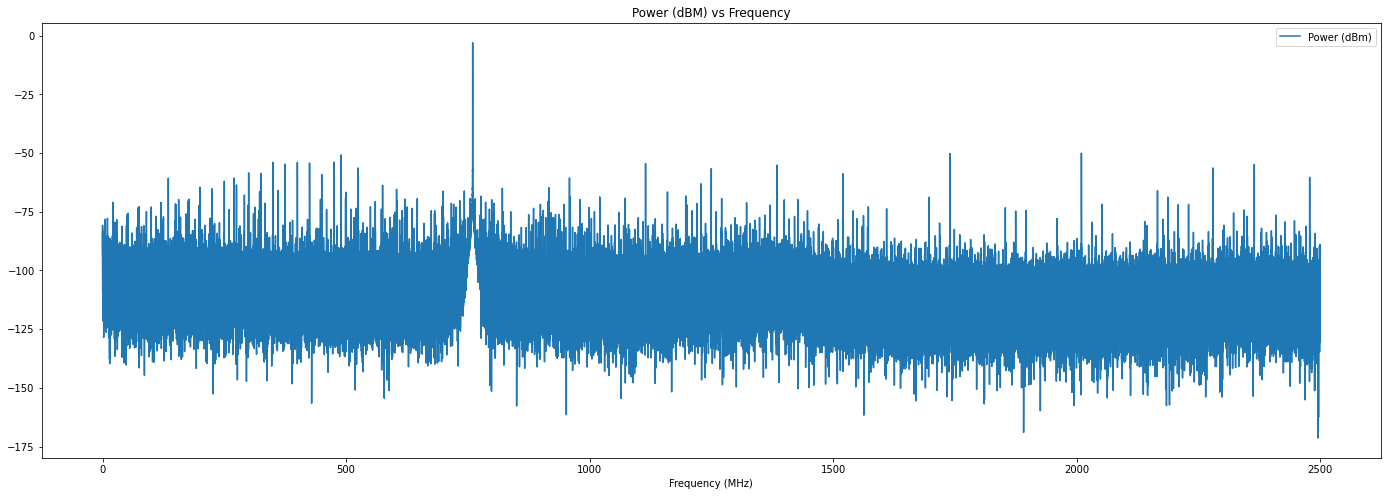

In [4]:
fftFrame.plot(x = 'Frequency (MHz)', y = 'Power (dBm)', title = 'Power (dBM) vs Frequency', figsize = (24,8));  #Semicolon hides prints
fftFrame.loc[fftFrame['Power (dBm)'] > -10]